In [49]:
import sys
import os
from pathlib import Path
# Add the utils directory to sys.path
sys.path.append(str(Path(os.getcwd()).resolve().parents[1]))

import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from utils.paper_plots import set_custom_color_style
from collections import defaultdict
import math

In [50]:
def autopct_threshold(pct):
    return f'{pct:.1f}%' if pct > 5 else ''

def plot_feedback_pies_grid(data, match_type, data_type):
    feedback_category = ["positive", "no feedback", "negative"]
    blues = set_custom_color_style()
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns
    
    if match_type == "with_self_matches":
        text = "including self matches"
    else:
        text = "excluding self matches"

    gears = ["gear2", "gear3"]
    for idx, gear in enumerate(gears):
        values = defaultdict(int)

        for video_data in data.values():
            # Check for match type
            if match_type not in video_data:
                continue

            gear_data = video_data[match_type].get(gear)
            if not gear_data:
                continue

            for feedback in feedback_category:
                values[feedback] += gear_data.get(feedback, 0)

        print(values)

        total = sum(values.values())
        if total == 0:
            axes[idx].text(0.5, 0.5, 'No Data', ha='center', va='center', fontsize=12)
            axes[idx].set_title(f"{gear.upper()} - {match_type}")
            axes[idx].axis('off')
        else:
            percentages = [100 * values[feedback] / total if total > 0 else 0 for feedback in feedback_category]
            legend_labels = [f"{feedback} - {pct:.1f}%" for feedback, pct in zip(feedback_category, percentages)]
            wedges, _, autotexts = axes[idx].pie(
                [values[s] for s in feedback_category],
                labels=feedback_category,
                #autopct='%1.1f%%',
                autopct= autopct_threshold,
                startangle=90,
                wedgeprops=dict(edgecolor='white'),
                textprops={'color': 'black'},
                pctdistance=0.8,
            )
            for autotext in autotexts:
                autotext.set_color("white")
            axes[idx].legend(wedges, legend_labels, title="Feedback type", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
            axes[idx].set_title(f"{gear.upper()} - {text}")
            

    fig.suptitle(f"Feedback Distribution per Gear for {data_type} ({text})", fontsize=14)
    plt.tight_layout()
    plt.show()

def plot_skier_feedback_pies(data, gear, match_type="no_self_matches"):
    feedback_categories = ["positive", "no feedback", "negative"]
    skier_ids = sorted(set(video_data.get("Skier_ID") for video_data in data.values() if "Skier_ID" in video_data))
    
    blues = set_custom_color_style()
    num_skiers = len(skier_ids)
    cols = 3
    rows = math.ceil(num_skiers / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))
    axes = axes.flatten()

    for idx, skier_id in enumerate(skier_ids):
        ax = axes[idx]
        feedback_totals = defaultdict(int)

        # Aggregate feedback for this skier
        for video_data in data.values():
            if video_data.get("Skier_ID") != skier_id:
                continue
            gear_data = video_data.get(match_type, {}).get(gear, {})
            for feedback in feedback_categories:
                feedback_totals[feedback] += gear_data.get(feedback, 0)

        counts = [feedback_totals[cat] for cat in feedback_categories]
        total = sum(counts)

        if total == 0:
            ax.text(0.5, 0.5, 'No Data', ha='center', va='center', fontsize=12)
            ax.axis('off')
            continue

        wedges, texts, _ = ax.pie(
            counts,
            labels=feedback_categories,
            autopct=autopct_threshold,
            startangle=90,
            textprops={'color': 'white'},
            wedgeprops=dict(edgecolor='white'),
            pctdistance=0.8,
        )
        for t in texts:
            t.set_color('black')

        percentages = [f"{(c / total * 100):.1f}%" for c in counts]
        legend_labels = [f"{cat}: {perc}" for cat, perc in zip(feedback_categories, percentages)]
        
        # Legend below the chart
        ax.legend(wedges, legend_labels, title="Feedback", loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, fontsize=8, title_fontsize=9)
        ax.set_title(f"Skier {skier_id}")

    # Hide unused axes
    for j in range(len(skier_ids), len(axes)):
        axes[j].axis('off')

    fig.suptitle(f"{gear.upper()} Feedback (excluding self matches)", fontsize=16)
    plt.subplots_adjust(top=0.97, bottom=0.05)
    plt.show()

In [51]:
def plot_combined_feedback_pie(data, match_type, data_type):
    feedback_category = ["positive", "no feedback", "negative"]
    values = defaultdict(int)

    if match_type == "with_self_matches":
        text = "including self matches"
    else:
        text = "excluding self matches"

    # Aggregate feedback from both gears
    for video_data in data.values():
        if match_type not in video_data:
            continue

        for gear in ["gear2", "gear3"]:
            gear_data = video_data[match_type].get(gear)
            if not gear_data:
                continue

            for feedback in feedback_category:
                values[feedback] += gear_data.get(feedback, 0)

    print(f"Combined: {values}")

    total = sum(values.values())

    fig, ax = plt.subplots(figsize=(6, 6))
    if total == 0:
        ax.text(0.5, 0.5, 'No Data', ha='center', va='center', fontsize=12)
        ax.set_title(f"Combined Gears - {text}")
        ax.axis('off')
    else:
        percentages = [100 * values[feedback] / total for feedback in feedback_category]
        legend_labels = [f"{feedback} - {pct:.1f}%" for feedback, pct in zip(feedback_category, percentages)]
        wedges, _, autotexts = ax.pie(
            [values[s] for s in feedback_category],
            labels=feedback_category,
            autopct='%1.1f%%',
            startangle=90,
            wedgeprops=dict(edgecolor='white'),
            textprops={'color': 'black'},
            pctdistance=0.8,
        )
        for autotext in autotexts:
            autotext.set_color("white")
        ax.legend(wedges, legend_labels, title="Feedback type", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
        ax.set_title(f"Combined Gears - {text}")

    fig.suptitle(f"Combined Feedback for {data_type} ({text})", fontsize=14)
    plt.tight_layout()
    plt.show()



# For experts

{'141': {'with_self_matches': {'gear2': {'positive': 3, 'no feedback': 1, 'negative': 0}, 'gear3': {'positive': 5, 'no feedback': 0, 'negative': 1}}, 'no_self_matches': {'gear2': {'positive': 3, 'no feedback': 1, 'negative': 0}, 'gear3': {'positive': 5, 'no feedback': 0, 'negative': 1}}, 'Skier_ID': 3}, '142': {'with_self_matches': {'gear2': {'positive': 2, 'no feedback': 4, 'negative': 0}, 'gear3': {'positive': 1, 'no feedback': 0, 'negative': 0}}, 'no_self_matches': {'gear2': {'positive': 2, 'no feedback': 4, 'negative': 0}, 'gear3': {'positive': 1, 'no feedback': 0, 'negative': 0}}, 'Skier_ID': 4}, '139': {'with_self_matches': {'gear2': {'positive': 3, 'no feedback': 2, 'negative': 0}, 'gear3': {'positive': 4, 'no feedback': 2, 'negative': 0}}, 'no_self_matches': {'gear2': {'positive': 3, 'no feedback': 2, 'negative': 0}, 'gear3': {'positive': 4, 'no feedback': 2, 'negative': 0}}, 'Skier_ID': 3}, '143': {'with_self_matches': {'gear2': {'positive': 0, 'no feedback': 2, 'negative': 2}

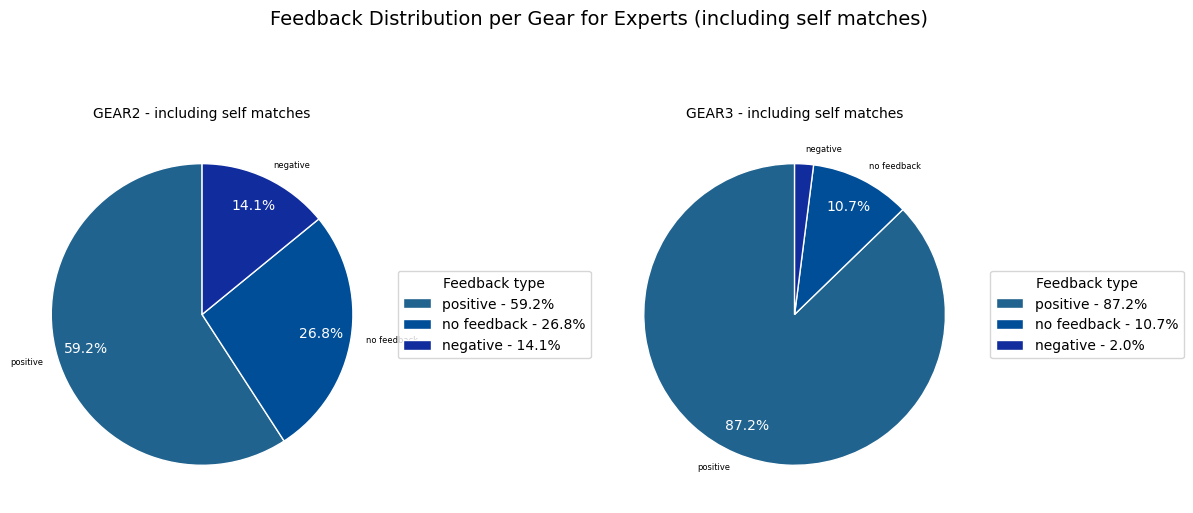

Combined: defaultdict(<class 'int'>, {'positive': 172, 'no feedback': 35, 'negative': 13})


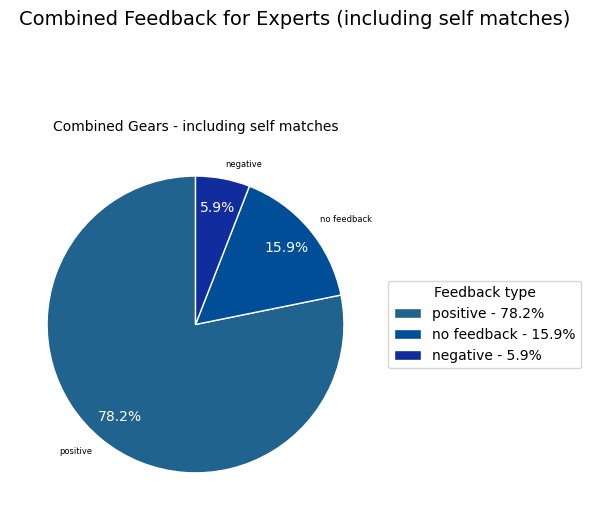

defaultdict(<class 'int'>, {'positive': 19, 'no feedback': 16, 'negative': 2})
defaultdict(<class 'int'>, {'positive': 40, 'no feedback': 10, 'negative': 1})


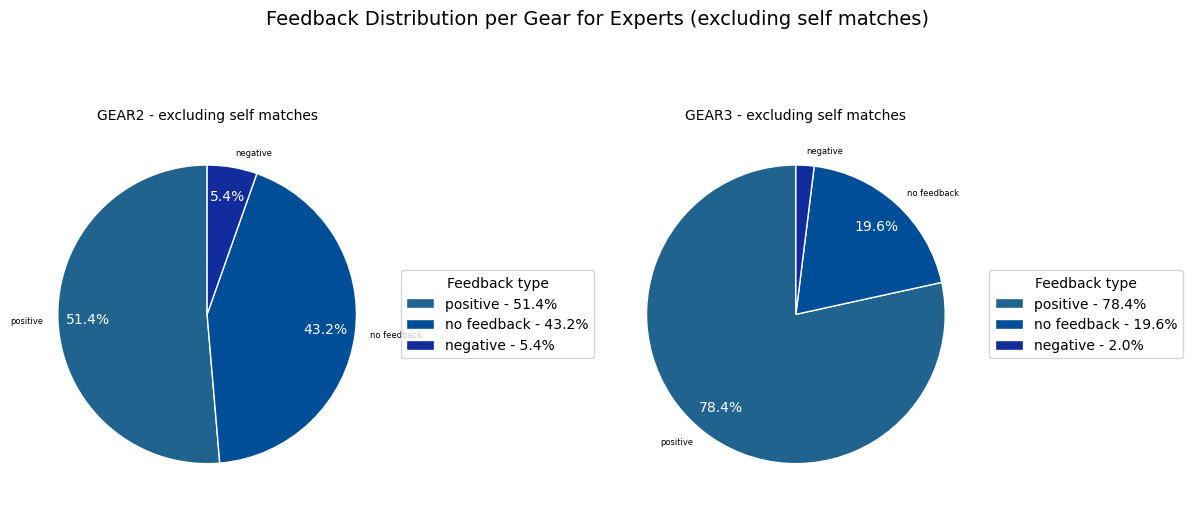

Combined: defaultdict(<class 'int'>, {'positive': 59, 'no feedback': 26, 'negative': 3})


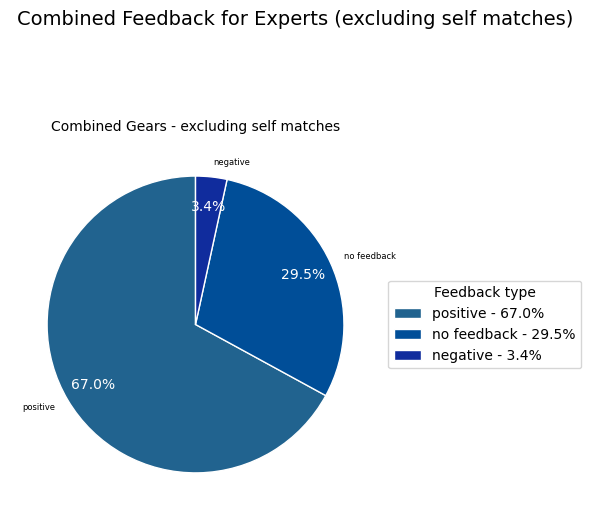

In [52]:
# load data
with open("../../data/feedback_evaluation/evaluation_stiff_ankle_experts_all_clean.json") as f:
    data_experts = json.load(f)

print(data_experts)

# Generate plots for each match type
for match_type in ["with_self_matches", "no_self_matches"]:
    plot_feedback_pies_grid(data_experts, match_type, "Experts")
    plot_combined_feedback_pie(data_experts, match_type, "Experts")
    #plot_push_vs_together_grid(data_experts, match_type, "Experts")

# For mixed level

defaultdict(<class 'int'>, {'positive': 53, 'no feedback': 87, 'negative': 51})
defaultdict(<class 'int'>, {'positive': 26, 'no feedback': 45, 'negative': 58})


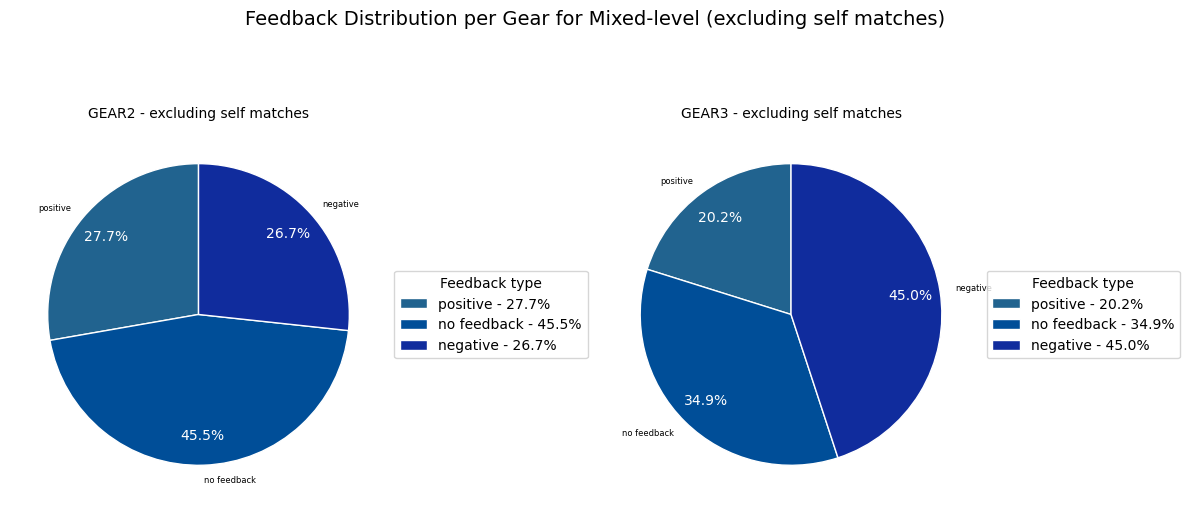

In [ ]:
with open("../../data/feedback_evaluation/evaluation_stiff_ankle_mixed_level.json") as f:
    data_mixed_level = json.load(f)

# Generate plots for each match type
for match_type in ["no_self_matches"]:
    plot_feedback_pies_grid(data_mixed_level, match_type, "Mixed-level")
    plot_combined_feedback_pie(data_mixed_level, match_type, "Mixed-level")

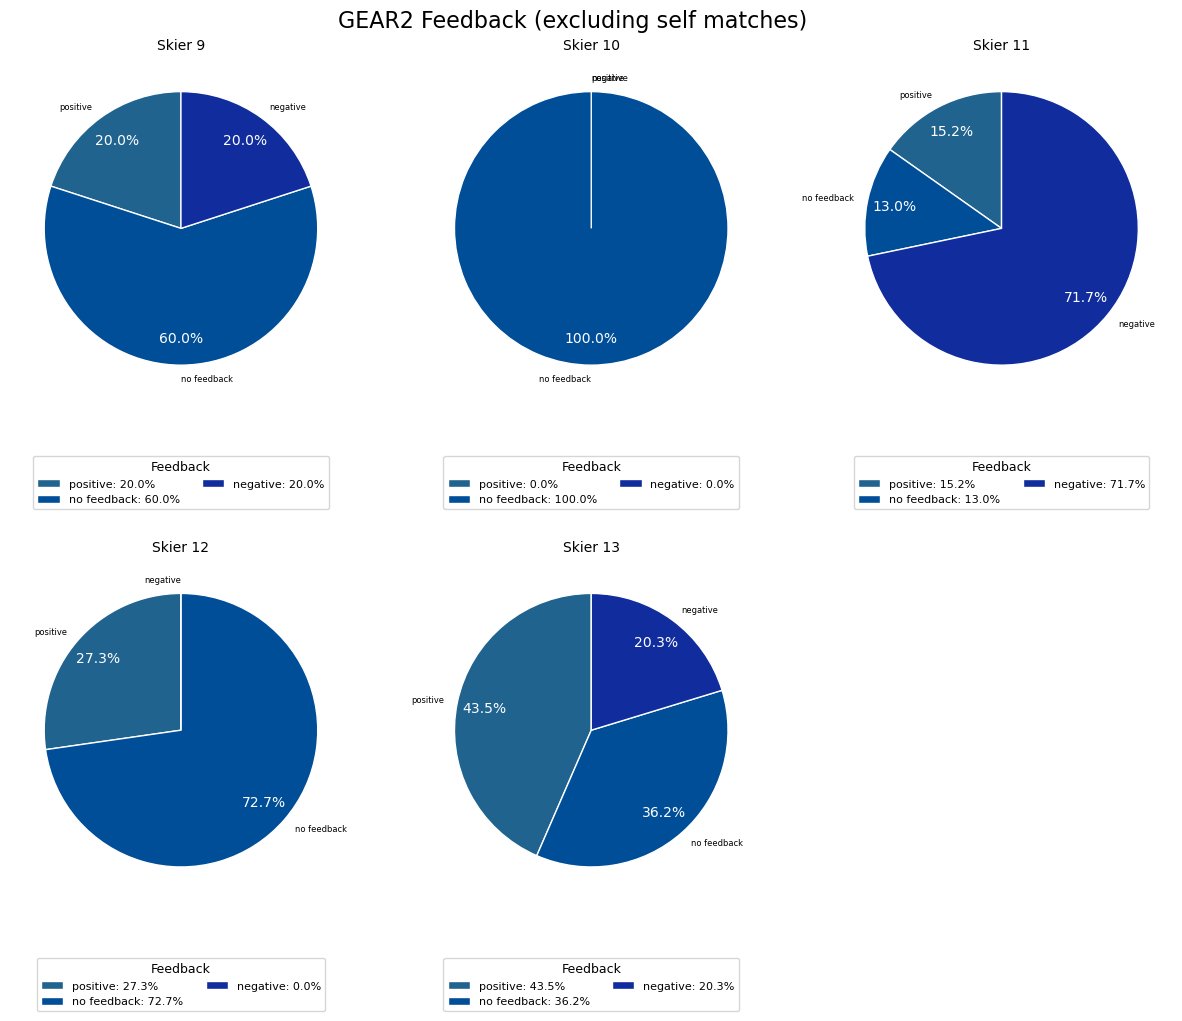

In [54]:
plot_skier_feedback_pies(data_mixed_level, gear="gear2")

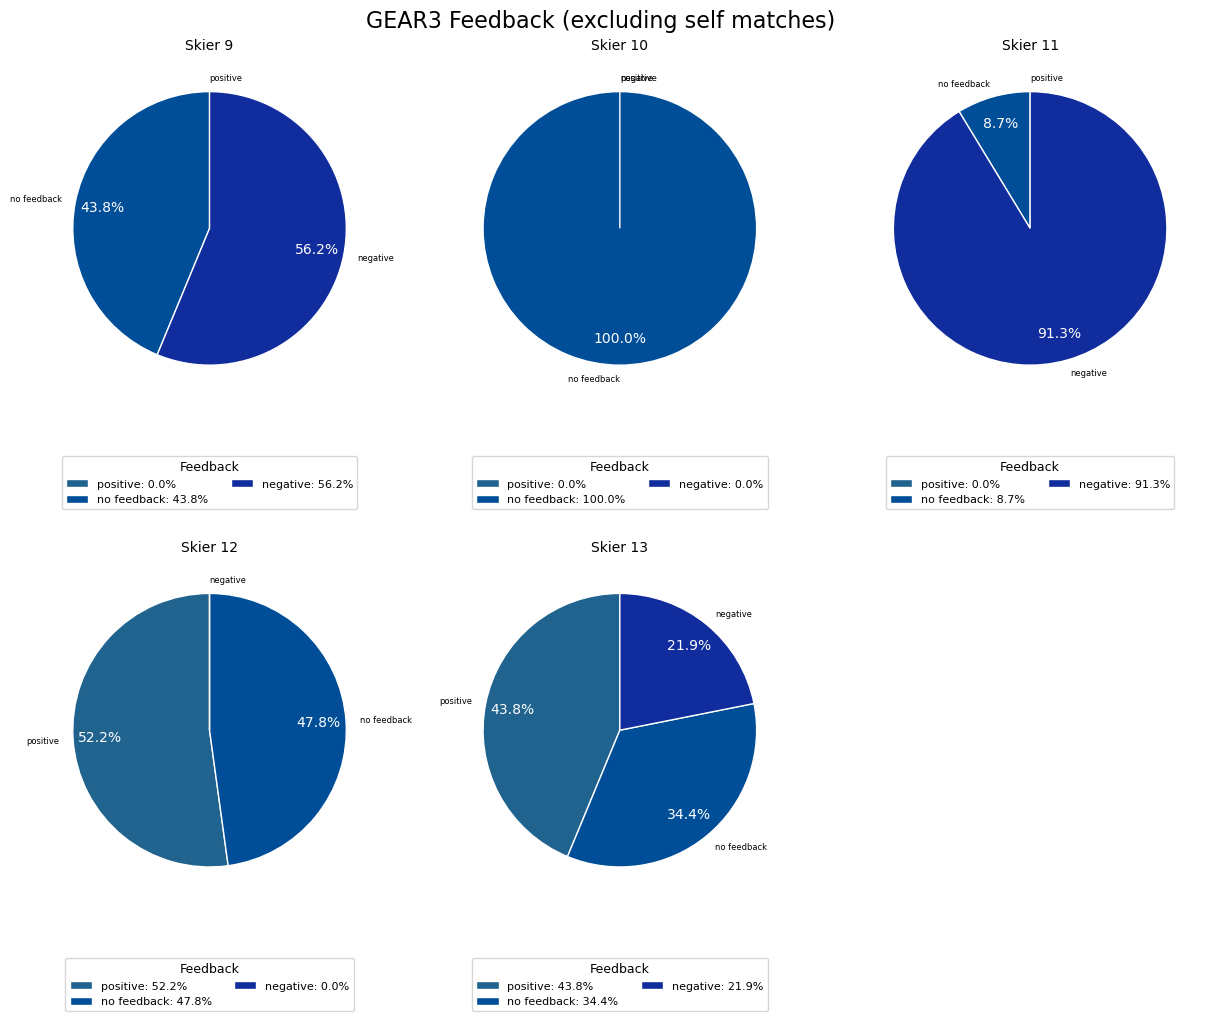

In [55]:
plot_skier_feedback_pies(data_mixed_level, gear="gear3")